#  EXPLORATION & PREDICTION OF SYSTEMIC CRISES
                                                                                                       Author: Potey DOAHI
_______________________________________________________________________________________________________________________________

## Problem Introduction 
 Sovereign debt is a promise by the government to pay those it borrowed money from, in order to finance their growth and development. Before buying a government's sovereign debt, investors assess the risk of the investment. 

 The most important risk in sovereign debt is the risk of default by the issuing country. When it comes to borrowing funds, countries with emerging economies can be at a disadvantage. Countries with stable economies and political systems are less likely to default in comparison to those with a history of instability.

● In order to understand the dynamics of financial stability within the African context, we seek to identify the factors that are most associated with systemic crises from 1860 to 2014.

## Executive Summary
Through a combination of visual and statistical methodologies, two (2) key factors: Banking crisis and Exchange rate were associated with Systemic crisis and also enabled a high-level equation that effectively modelled and picked up Systemic crisis.


Text(0.5, 1.0, 'Regressive Equation plot')

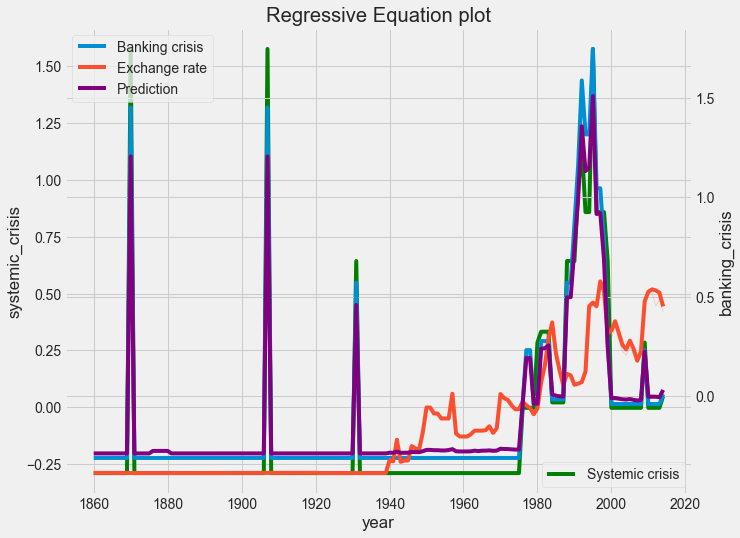

In [35]:
fig, axes = plt.subplots(figsize=(10,8))

axis1=sns.lineplot(x=v8.index, y='systemic_crisis', data=v8, ci=False, color='green', label='Systemic crisis')
axis2=axis1.twinx()
axis2=sns.lineplot(x=v8.index, y='banking_crisis', data=v8, ci=False, label='Banking crisis')
axis2=sns.lineplot(x=v8.index, y='exch_usd', data=v8, ci=False, label='Exchange rate')
axis2=sns.lineplot(x=v8.index, y='Prediction', data=v8, ci=False, color='purple', label='Prediction')
plt.title('Regressive Equation plot')

# Exploratory Data Analysis

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
# Configure Notebooks graphic output
import matplotlib as mpl
%matplotlib inline
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [4]:
#Importing Dataset
import os
os.chdir("C:\\Users\\pdoah\\OneDrive\\Desktop\\Final project")
df=pd.read_csv("african_crises.csv")

••● Cleaning data 

In [5]:

#dropping column 'case' and 'cc3' and renaming column
dataframe=df.drop(['case', 'cc3'], axis=1).rename(columns=
    {'domestic_debt_in_default':'sovereign_domestic_debt_default'})

#Transforming banking_crisis to 0 and 1
labels = {'no_crisis': 0, 'crisis': 1}
dataframe['banking_crisis'] = dataframe['banking_crisis'].map(labels)

# Currency_crises should only have 2 lables 0 & 1
dataframe['currency_crises'] = dataframe['currency_crises'].replace(2,np.nan)
dataframe = dataframe.dropna()

••● Exploratory Data Analysis

In [ ]:
#Exploratory Data Analytics
dataframe.info()

dataframe.describe()

  No missing data
  
  
  

# VISUAL METHODOLOGY: Descriptive Statistical Analysis

 ••● How is the overall trend in Debt defaults and crises between 1860 to 2014?

●The data shows that:

Between 1860 and 2014, every country experienced banking crises. 
Central African Republic had the highest count and Mauritus the lowest.

Majority of the countries that experienced banking crises also experienced
systemic crises. Central African Republic had the highest count, and Mauritus is one of the three 
countries (Angola, South Africa) that did not suffer systemic crises.

Every country also experienced both inflation and currency crises. 
They also all defaulted on their external debt, except Mauritus.

Only Zimbabwe and Angola were in domestic debt default. 

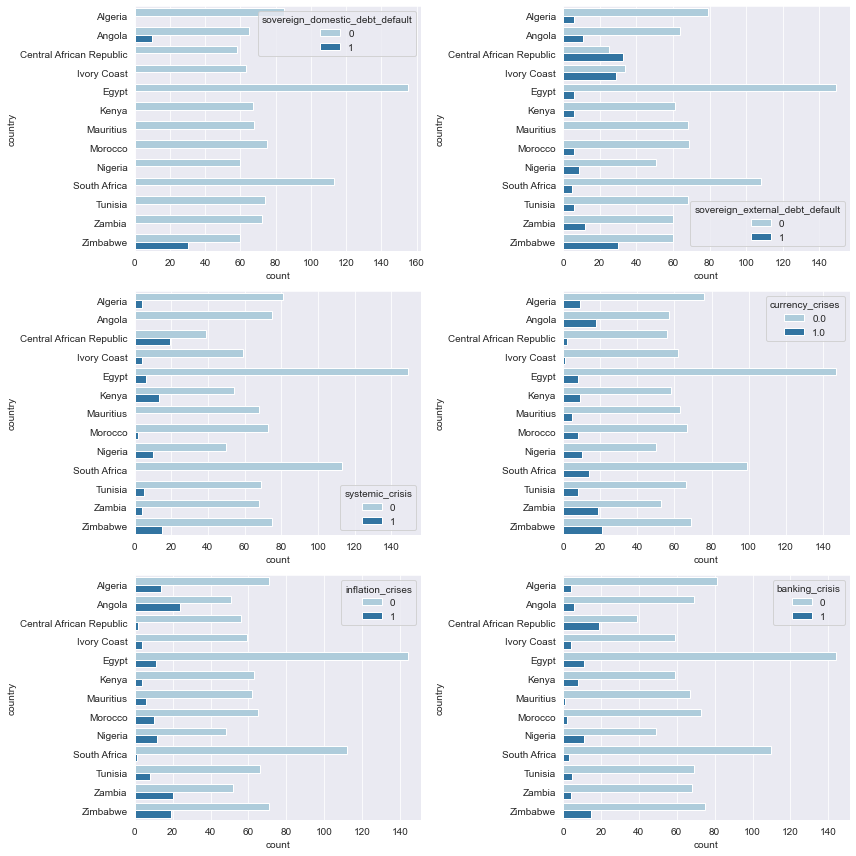

In [10]:
#Visualize the data: Debt defaults and crises between 1860 to 2014
cols = ['sovereign_domestic_debt_default', 'sovereign_external_debt_default', 
        'systemic_crisis','currency_crises', 'inflation_crises', 'banking_crisis']
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(12,12))
axes = axes.flatten()
for i, ax in zip(cols, axes):
  sns.countplot(y = 'country', ax = ax, data = dataframe, hue = i, palette = 'Paired')
plt.tight_layout()

••● How is the overall trend in Debt defaults and crises before and after independence?

●The data shows that:

Most African countries started suffering Economic, Banking and Systemic Crisis after Independence: 

Majority of African Countries that suffered Banking crises after their independence, also suffered Systemic Crises. 

Every country defaulted on external debt, only after their independence. 
Most affected being Central Africa Republic, Ivory Coast, Zimbabwe, Zambia, Angola.  

Inflation and Currency crises were the major forms of crisis affecting some African countries before their independence. 
After independence the number of countries that experienced inflation and currency crises significantly increased.

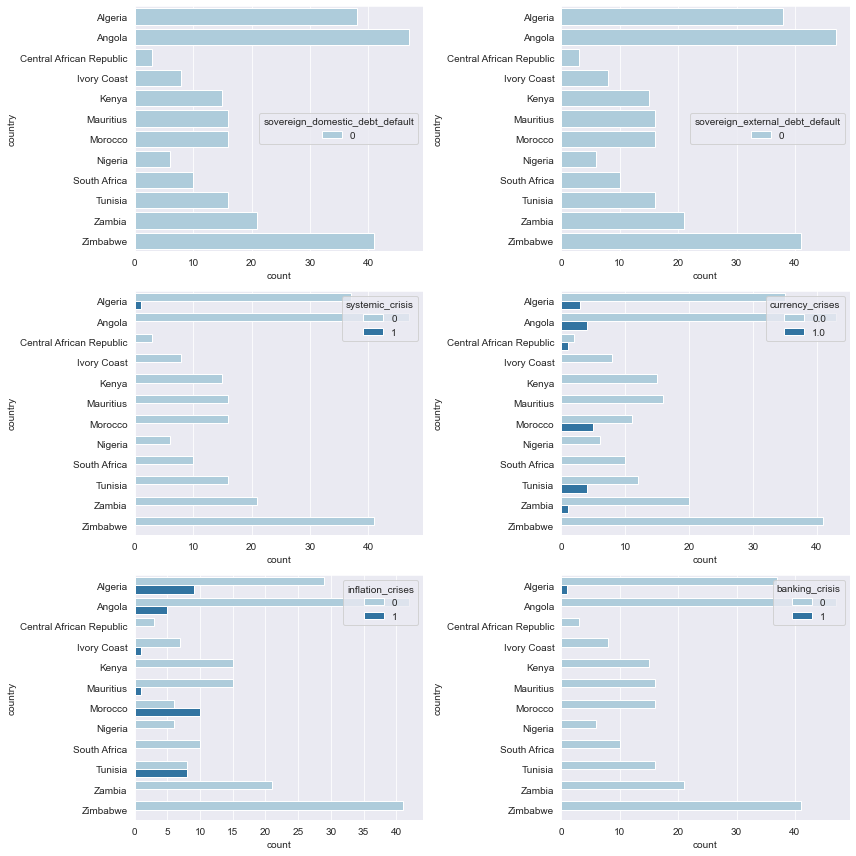

In [11]:
#Visualize the data: debt defaults and crises Before Independence
before_independence = dataframe[dataframe['independence']==0] 
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(12,12))
axes = axes.flatten()
for i, ax in zip(cols, axes):
  sns.countplot(y = 'country', ax = ax, data = before_independence, hue = i, palette = 'Paired') #cols in 1st vizzies
plt.tight_layout()

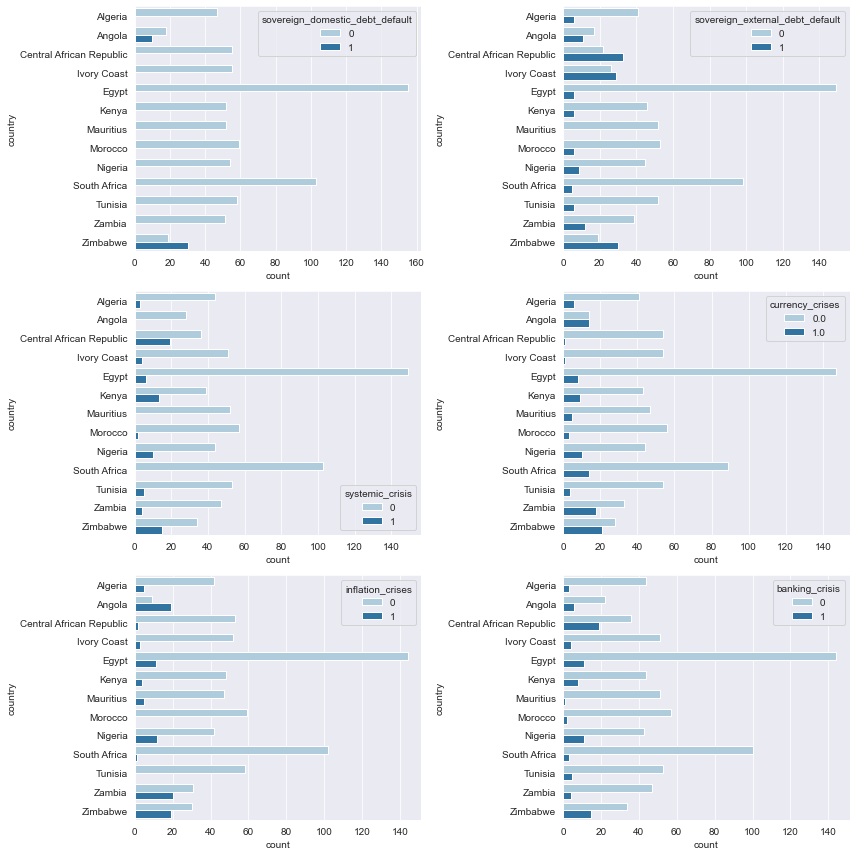

In [12]:
#Visualize the data: debt defaults and crises After Independence
after_independence = dataframe[dataframe['independence']==1]
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(12,12))
axes = axes.flatten()
for i, ax in zip(cols, axes):
  sns.countplot(y = 'country', ax = ax, data = after_independence, hue = i, palette = 'Paired')
plt.tight_layout()

••● How is the trend in Exchange Rates vis á vis USD in different countries?


● The data shows an increasing trend in the Exchange Rate for all the countries combined, starting from 1940.

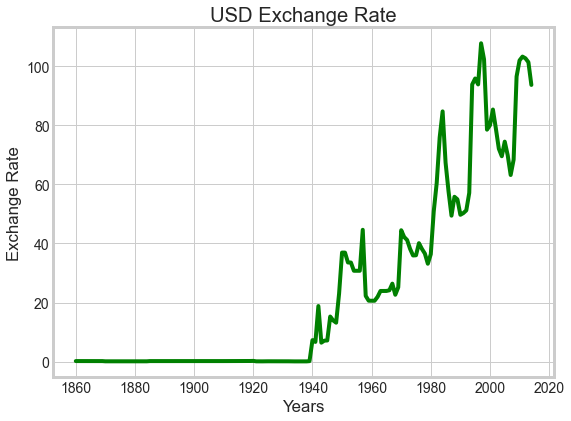

In [107]:
# Quick Visualization of the usd exchange rate in all the countries combined.
df1=dataframe[['year','exch_usd']]
df2 = df1.groupby('year').mean()

plt.figure(figsize=(8,6))
sns.lineplot(x = 'year', y = 'exch_usd', 
               data = df2, color='Green')
plt.title('USD Exchange Rate')
plt.ylabel('Exchange Rate');
plt.xlabel('Years')
plt.show();

••● How is the trend in Exchange Rates vis á vis USD in different countries before and after independence?

All countries had their independence after 1940, except South Africa and Egypt. 

Before independence, the exchange rates were constant for majority of the countries.

After independence, we see an increasing trend in the exchange rates for most countries, 
except Tunisia where there was a fall and Ivory Coast where the rates increased from 1970 and later fall in 2000

The increase in the foreign exchange rate leads to the cheaper domestic goods for foreign consumers, 
resulting in the increase of exports and total demands and prices. 
The increase in the foreign exchange price raises the inflation rate, causing an inflation crisis.


Source: investopedia /
https://ecsdev.org/ojs/index.php/ejsd/article/download/574/571/1139#:~:text=The%20increase%20in%20the%20foreign,price%20raises%20the%20inflation%20rate.

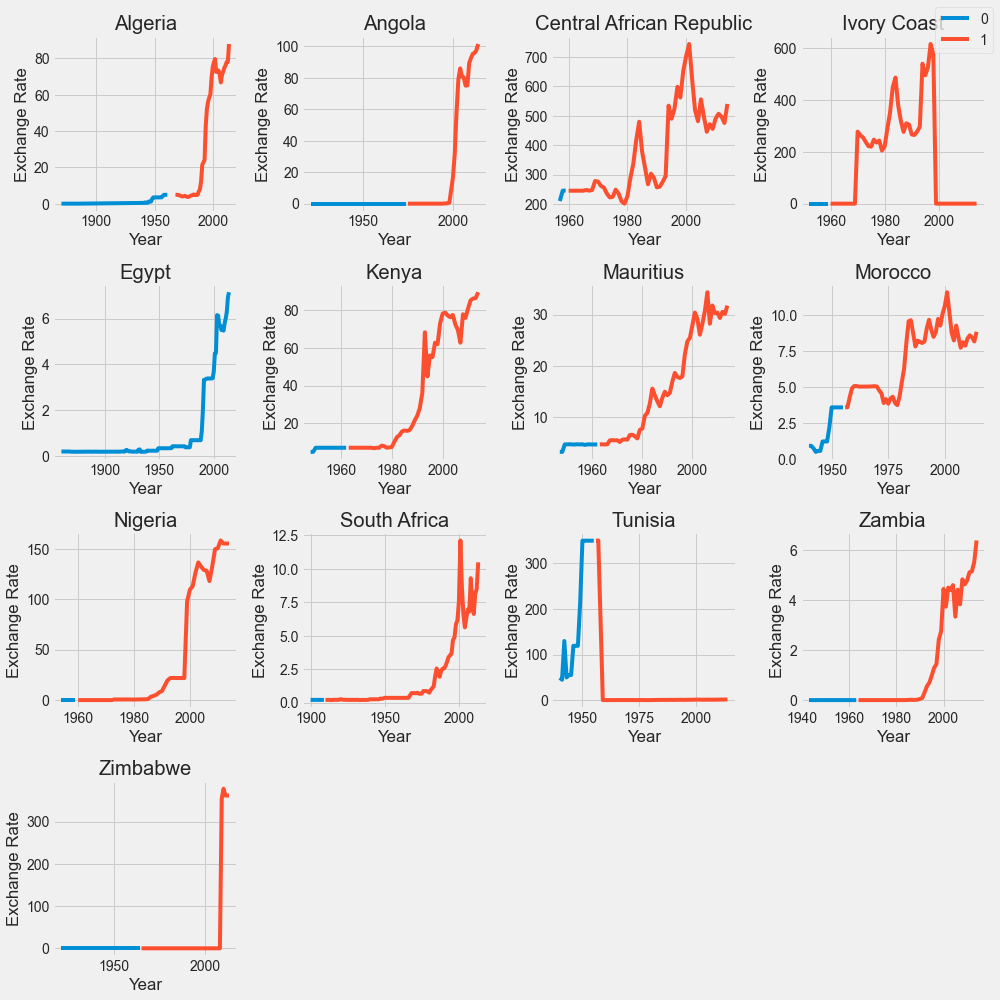

In [63]:
#Trend in Exchange Rate before and after independence
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
plt.style.use('fivethirtyeight')
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(14,14))
axes = axes.flatten()

for i, ax in zip(dataframe['country'].unique(), axes):
  sns.lineplot(x = 'year', y = 'exch_usd', hue = 'independence', 
               data = dataframe[dataframe['country'] == i], ax = ax)
  ax.set_xlabel('Year')
  ax.set_ylabel('Exchange Rate')
  ax.set_title('{}'.format(i))
  ax.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc=1)
fig.subplots_adjust(top=0.95)
for i in range(13,16):
  fig.delaxes(axes[i])
plt.tight_layout()

# OBSERVATION :
It is fair to assume from our visuals that Systemic crises are associated
with Banking crises, External Debt Default, Exchange rate, Inflation and Currency crises.

# STATISTICAL METHODOLOGY: Inferential Statistical Analysis

In [7]:
#Normalizing data
X = dataframe
X_means = X.mean()
X_stds = X.std()
X = (X-X_means)/X_stds

C:\Users\pdoah\AppData\Local\Temp/ipykernel_16980/3110837786.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_means = X.mean()
C:\Users\pdoah\AppData\Local\Temp/ipykernel_16980/3110837786.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_stds = X.std()


<AxesSubplot:>

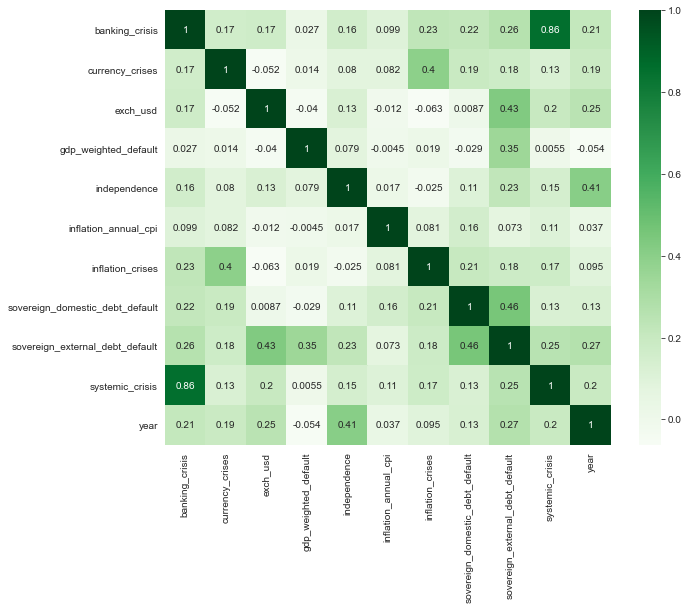

In [237]:
#Creating heatmap to show correlation between variables
plt.figure(figsize=(10,8))
df_corr = X.corr(method='pearson')
sns.heatmap(df_corr, annot=True, cmap=plt.cm.Greens)

Text(0.5, 1.0, 'Correlated Bar Plot (vs. Systemic crisis)')

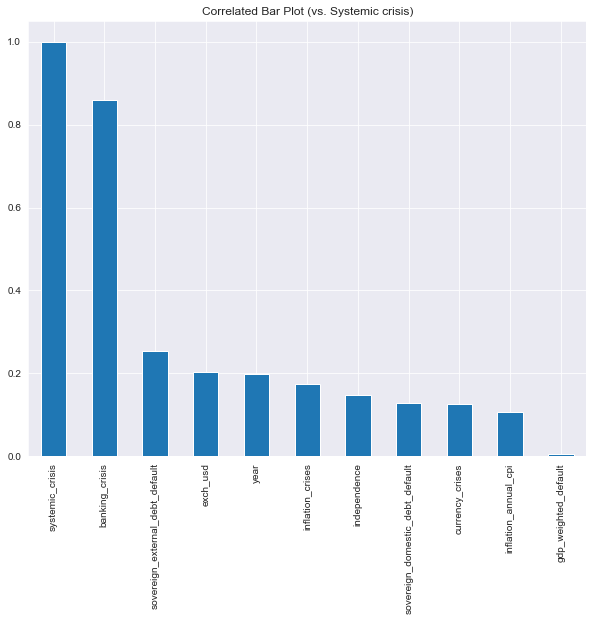

In [238]:
#Visualizing Variables correlation
plt.figure(figsize=(10,8))
rc=df_corr.iloc[-2]
sorted_rc=rc.sort_values(ascending=False)

sorted_rc.plot(kind='bar')
plt.title('Correlated Bar Plot (vs. Systemic crisis)')

 ● Systemic crisis shows a positive correlation with all the variables, particularly with:
    
    — Banking crisis, which could explain the fact that most African countries that majorly suffered Banking Crises, 
    also suffered Systemic crises.
    — Sovereign External Debt Default and Exchange Rate.
 
 The order variables are ignored in order to prevent multicollinearity. For example 'Sovereign External Debt Default', which is significantly correlated with 'Sovereign Domestic Debt Default'.

# Multivariate Regression Model

In [8]:
#Importing library
from statsmodels.formula.api import ols

In [9]:
#Defining independent and dependent variables using normalized data
independent_variables = sm.add_constant(X.loc[:,['banking_crisis', 'sovereign_external_debt_default', 
                                                              'exch_usd']])
dependent_variable = pd.DataFrame(X['systemic_crisis'])

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [10]:
#creating model
regression_model = sm.OLS(dependent_variable, independent_variables).fit()
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        systemic_crisis   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     1001.
Date:                Thu, 13 Jan 2022   Prob (F-statistic):          1.83e-307
Time:                        23:09:21   Log-Likelihood:                -784.39
No. Observations:                1055   AIC:                             1577.
Df Residuals:                    1051   BIC:                             1597.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -1.006e-16      0.016  -6.41e-15      1.000      -0.031       0.031
banking_crisis                      0.8472      0.016     51.946      0.000       0.815       0.879
sovereign_external_debt_default     0.0090      0.018      0.508      0.612      -0.026       0.044
exch_usd                            0.0540      0.017      3.101      0.002       0.020       0.088
==============================================================================
Omnibus:                      447.410   Durbin-Watson:                   0.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46746.853
Skew:                          -0.957   Prob(JB):                         0.00
Kurtosis:                      35.554   Cond. No.                         1.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*  Regression Model:
74% of the time, our predictive value will match our actual.

Text(0.5, 1.0, 'Regression coefficient')

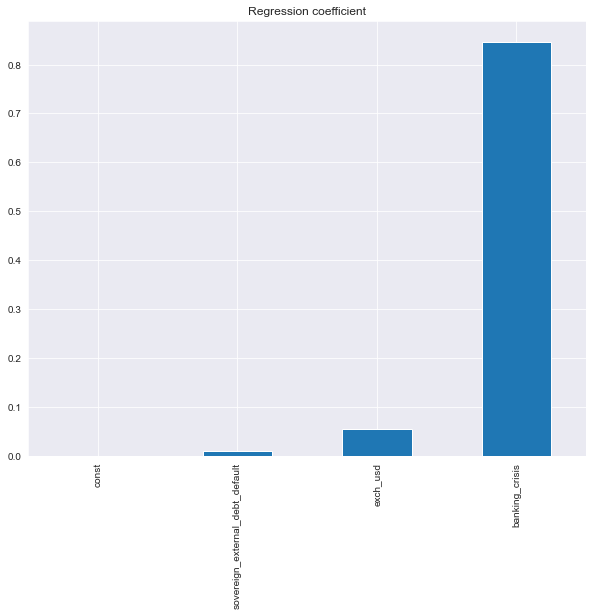

In [215]:
#Analysis of coefficient
plt.figure(figsize=(10,8))
a0=regression_model.params.sort_values(ascending=True)
a0.plot(kind='bar')
plt.title('Regression coefficient')

 # OBSERVATION:
The data have enabled us to identify through statistical methodology Banking crises and Exch_usd, as variables of interest to identify the factors mostly associated with Systemic crises.

# MODEL VALIDATION


● 1st OBSERVATION :
Visuals methodology: Systemic crises are associated with Banking crises, Sovereign External Debt Default, Exchange rate, Inflation and Currency crises and year.


● 2nd OBSERVATION:
Statistical methodology:Systemic crises are associated with Banking crises and Exchange rate.


● Conclusion:
Banking Crisis and exchange rate are the factors most associated with systemic crises

In [16]:
#Validating our predictions
X['Prediction']= regression_model.predict(independent_variables)
X.year=dataframe.year
v8=X.set_index(X.year)

Text(0.5, 1.0, 'Regressive Equation plot')

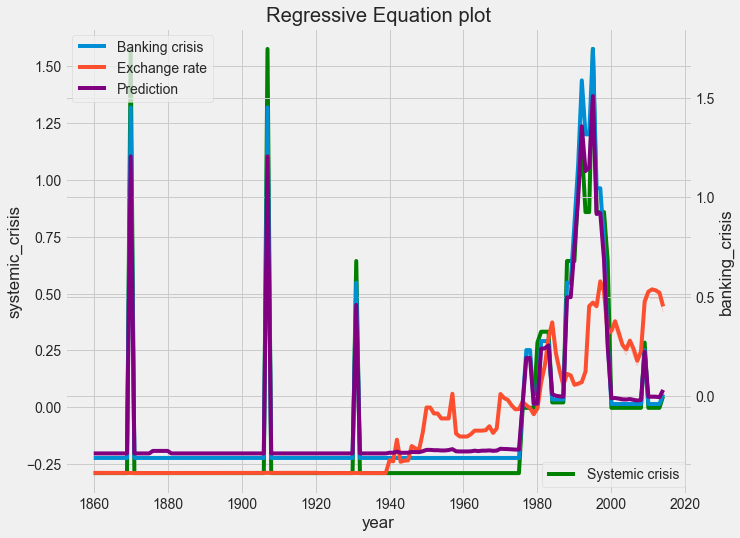

In [36]:
fig, axes = plt.subplots(figsize=(10,8))

axis1=sns.lineplot(x=v8.index, y='systemic_crisis', data=v8, ci=False, color='green', label='Systemic crisis')
axis2=axis1.twinx()
axis2=sns.lineplot(x=v8.index, y='banking_crisis', data=v8, ci=False, label='Banking crisis')
axis2=sns.lineplot(x=v8.index, y='exch_usd', data=v8, ci=False, label='Exchange rate')
axis2=sns.lineplot(x=v8.index, y='Prediction', data=v8, ci=False, color='purple', label='Prediction')
plt.title('Regressive Equation plot')

# Conclusion and Recommendations:

What comes out from our analysis of African financial stability is that there are strong linkages between currency, banking, and debt crises.

Evidence suggests that systemic crises are most associated with banking crises in the African context. other common
causes include Weak macroeconomic background (negative fiscal balances, devaluation, high interest rates...) and Structural weaknesses (inadequate regulation and supervision; poor governance...)

The data suggests that Mauritus and Morocco would be the best of the thirteen (13) countries to invest in (to buy sovereign debt), as they both account for the least amount of banking crisis. The increasing trend in their exchange rate is associated with high interest rate, which subsequently offers lenders in an economy a higher return relative to other countries.

There are several approaches to managing banking crises. Strategies are based on country conditions. Political will is essential for successful crisis management. Other solutions include but not limited to:
• Containing the crisis: to stabilize the situation and restore public confidence.
• Bank restructuring: to restore the viability of financial system; improve the incentive structure...

Source: https://www.afdb.org/fileadmin/uploads/afdb/Documents/Publications/African%20Systemic%20Financial%20Crises.pdf
